Single-channel CSC (Constrained Data Fidelity)
==============================================

This example demonstrates solving a constrained convolutional sparse coding problem with a greyscale signal

  $$\mathrm{argmin}_\mathbf{x} \sum_m \| \mathbf{x}_m \|_1 \; \text{such that} \;  \left\| \sum_m \mathbf{d}_m * \mathbf{x}_m - \mathbf{s} \right\|_2 \leq \epsilon \;,$$

where $\mathbf{d}_{m}$ is the $m^{\text{th}}$ dictionary filter, $\mathbf{x}_{m}$ is the coefficient map corresponding to the $m^{\text{th}}$ dictionary filter, and $\mathbf{s}$ is the input image.

In [1]:
from __future__ import print_function
from builtins import input

import pyfftw   # See https://github.com/pyFFTW/pyFFTW/issues/40
import numpy as np

from sporco import util
from sporco import signal
from sporco import plot
plot.config_notebook_plotting()
import sporco.metric as sm
from sporco.admm import cbpdn

Load example image.

In [2]:
img = util.ExampleImages().image('kodim23.png', scaled=True, gray=True,
                                idxexp=np.s_[160:416,60:316])

Highpass filter example image.

In [3]:
npd = 16
fltlmbd = 10
sl, sh = signal.tikhonov_filter(img, fltlmbd, npd)

Load dictionary and display it.

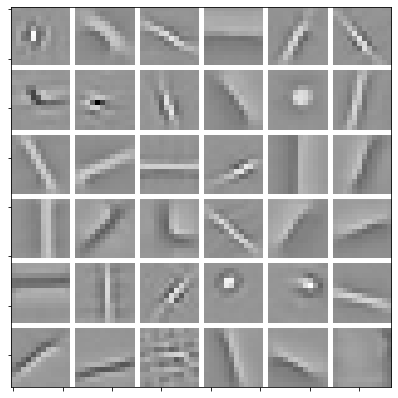

In [4]:
D = util.convdicts()['G:12x12x36']
plot.imview(util.tiledict(D), fgsz=(7, 7))

Set [admm.cbpdn.ConvMinL1InL2Ball](http://sporco.rtfd.org/en/latest/modules/sporco.admm.cbpdn.html#sporco.admm.cbpdn.ConvMinL1InL2Ball) solver options.

In [5]:
epsilon = 3.4e0
opt = cbpdn.ConvMinL1InL2Ball.Options({'Verbose': True, 'MaxMainIter': 200,
                        'HighMemSolve': True, 'LinSolveCheck': True,
                        'RelStopTol': 5e-3, 'AuxVarObj': False, 'rho': 50.0,
                        'AutoRho': {'Enabled': False}})

Initialise and run CSC solver.

In [6]:
b = cbpdn.ConvMinL1InL2Ball(D, sh, epsilon, opt)
X = b.solve()
print("ConvMinL1InL2Ball solve time: %.2fs" % b.timer.elapsed('solve'))

Itn   Fnc       Cnstr     r         s       
--------------------------------------------


   0  1.55e+03  0.00e+00  1.11e-01  1.00e+00
   1  1.30e+03  0.00e+00  9.51e-02  1.00e+00


   2  1.25e+03  0.00e+00  7.87e-02  4.82e-01
   3  1.13e+03  1.64e-01  6.66e-02  3.58e-01


   4  9.50e+02  0.00e+00  5.43e-02  3.09e-01
   5  8.50e+02  1.32e-01  4.53e-02  2.18e-01


   6  8.07e+02  0.00e+00  3.81e-02  1.76e-01
   7  7.57e+02  7.15e-02  3.30e-02  1.50e-01


   8  7.24e+02  0.00e+00  2.85e-02  1.31e-01
   9  6.90e+02  4.45e-02  2.51e-02  1.12e-01


  10  6.58e+02  0.00e+00  2.22e-02  9.76e-02
  11  6.26e+02  3.12e-02  1.97e-02  8.46e-02


  12  6.01e+02  0.00e+00  1.75e-02  7.47e-02
  13  5.82e+02  2.02e-02  1.58e-02  6.57e-02


  14  5.68e+02  0.00e+00  1.43e-02  5.99e-02
  15  5.54e+02  1.25e-02  1.30e-02  5.37e-02


  16  5.43e+02  0.00e+00  1.18e-02  4.99e-02
  17  5.29e+02  9.03e-03  1.08e-02  4.54e-02


  18  5.15e+02  0.00e+00  9.85e-03  4.15e-02
  19  5.05e+02  7.18e-03  9.09e-03  3.73e-02


  20  4.99e+02  0.00e+00  8.45e-03  3.46e-02
  21  4.92e+02  5.13e-03  7.85e-03  3.23e-02


  22  4.84e+02  0.00e+00  7.27e-03  3.01e-02
  23  4.79e+02  3.06e-03  6.79e-03  2.79e-02


  24  4.75e+02  0.00e+00  6.36e-03  2.63e-02
  25  4.69e+02  2.07e-03  5.95e-03  2.46e-02


  26  4.63e+02  3.11e-04  5.56e-03  2.30e-02
  27  4.59e+02  1.95e-03  5.23e-03  2.15e-02


  28  4.54e+02  8.82e-04  4.92e-03  2.02e-02
  29  4.49e+02  1.84e-03  4.61e-03  1.89e-02


  30  4.44e+02  9.92e-04  4.33e-03  1.76e-02
  31  4.42e+02  1.40e-03  4.10e-03  1.65e-02


  32  4.40e+02  6.98e-04  3.89e-03  1.56e-02
  33  4.37e+02  8.86e-04  3.68e-03  1.49e-02


  34  4.35e+02  4.57e-04  3.48e-03  1.41e-02
  35  4.33e+02  6.74e-04  3.31e-03  1.34e-02


  36  4.30e+02  5.06e-04  3.15e-03  1.28e-02
  37  4.27e+02  7.06e-04  2.98e-03  1.21e-02


  38  4.24e+02  5.97e-04  2.83e-03  1.13e-02
  39  4.23e+02  6.59e-04  2.69e-03  1.07e-02


  40  4.21e+02  5.39e-04  2.57e-03  1.02e-02
  41  4.20e+02  5.51e-04  2.45e-03  9.75e-03


  42  4.18e+02  4.53e-04  2.33e-03  9.28e-03
  43  4.17e+02  4.39e-04  2.23e-03  8.82e-03


  44  4.15e+02  3.64e-04  2.13e-03  8.40e-03
  45  4.14e+02  3.38e-04  2.04e-03  8.04e-03


  46  4.13e+02  2.98e-04  1.95e-03  7.68e-03
  47  4.12e+02  2.88e-04  1.86e-03  7.33e-03


  48  4.10e+02  2.94e-04  1.78e-03  6.99e-03
  49  4.09e+02  3.10e-04  1.71e-03  6.67e-03


  50  4.08e+02  3.48e-04  1.64e-03  6.37e-03
  51  4.07e+02  3.49e-04  1.57e-03  6.08e-03


  52  4.06e+02  3.69e-04  1.51e-03  5.80e-03
  53  4.05e+02  3.28e-04  1.45e-03  5.54e-03


  54  4.04e+02  2.88e-04  1.40e-03  5.32e-03
  55  4.04e+02  2.25e-04  1.34e-03  5.11e-03


  56  4.03e+02  1.91e-04  1.30e-03  4.93e-03
--------------------------------------------
ConvMinL1InL2Ball solve time: 15.38s


Reconstruct image from sparse representation.

In [7]:
shr = b.reconstruct().squeeze()
imgr = sl + shr
print("Reconstruction PSNR: %.2fdB\n" % sm.psnr(img, imgr))

Reconstruction PSNR: 37.02dB



Display low pass component and sum of absolute values of coefficient maps of highpass component.

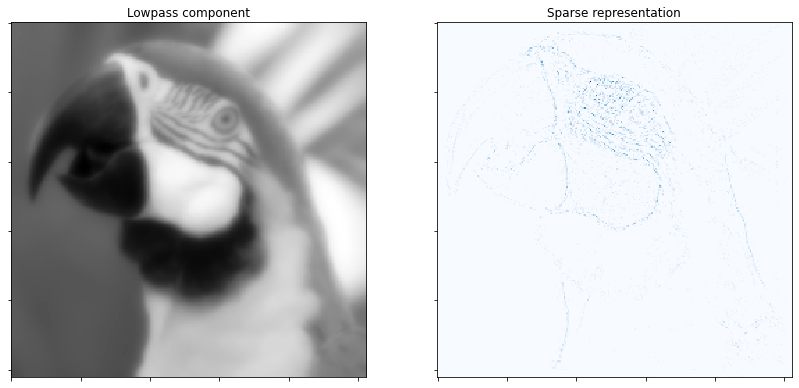

In [8]:
fig = plot.figure(figsize=(14, 7))
plot.subplot(1, 2, 1)
plot.imview(sl, title='Lowpass component', fig=fig)
plot.subplot(1, 2, 2)
plot.imview(np.sum(abs(X), axis=b.cri.axisM).squeeze(), cmap=plot.cm.Blues,
            title='Sparse representation', fig=fig)
fig.show()

Display original and reconstructed images.

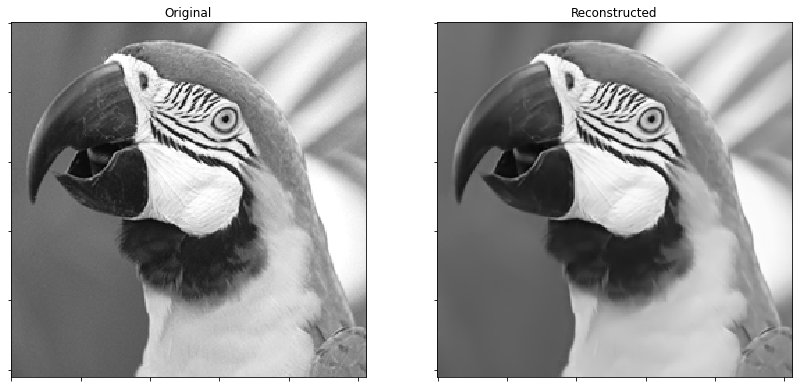

In [9]:
fig = plot.figure(figsize=(14, 7))
plot.subplot(1, 2, 1)
plot.imview(img, title='Original', fig=fig)
plot.subplot(1, 2, 2)
plot.imview(imgr, title='Reconstructed', fig=fig)
fig.show()

Get iterations statistics from solver object and plot functional value, ADMM primary and dual residuals, and automatically adjusted ADMM penalty parameter against the iteration number.

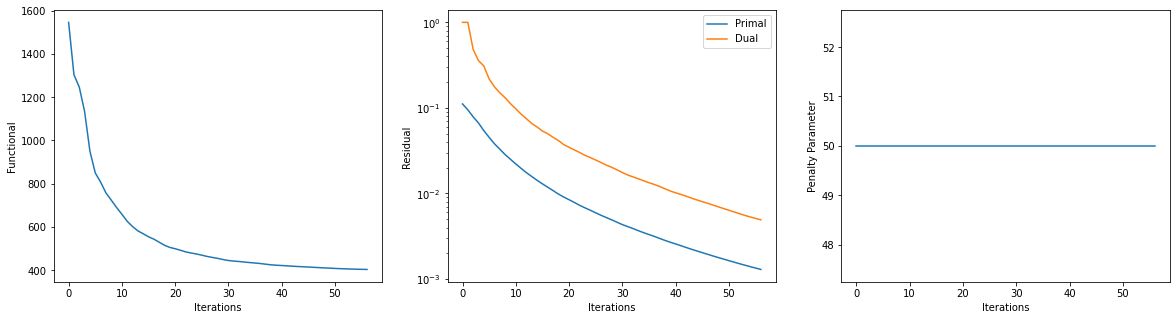

In [10]:
its = b.getitstat()
fig = plot.figure(figsize=(20, 5))
plot.subplot(1, 3, 1)
plot.plot(its.ObjFun, xlbl='Iterations', ylbl='Functional', fig=fig)
plot.subplot(1, 3, 2)
plot.plot(np.vstack((its.PrimalRsdl, its.DualRsdl)).T,
          ptyp='semilogy', xlbl='Iterations', ylbl='Residual',
          lgnd=['Primal', 'Dual'], fig=fig)
plot.subplot(1, 3, 3)
plot.plot(its.Rho, xlbl='Iterations', ylbl='Penalty Parameter', fig=fig)
fig.show()